# **Import Library**

Pada tahap ini, diperlukan mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from yellowbrick.cluster import KElbowVisualizer

# **Memuat Dataset**

Memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#Type your code here
# Memuat dataset menggunakan pandas
data = pd.read_csv('Customer Data.csv')

# Menampilkan beberapa baris pertama dataset untuk memastikan data berhasil dimuat
print("Beberapa baris pertama dataset:")
print(data.head())

Beberapa baris pertama dataset:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1   

# **Exploratory Data Analysis (EDA)**

Melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Shape of the dataset: (8950, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  89

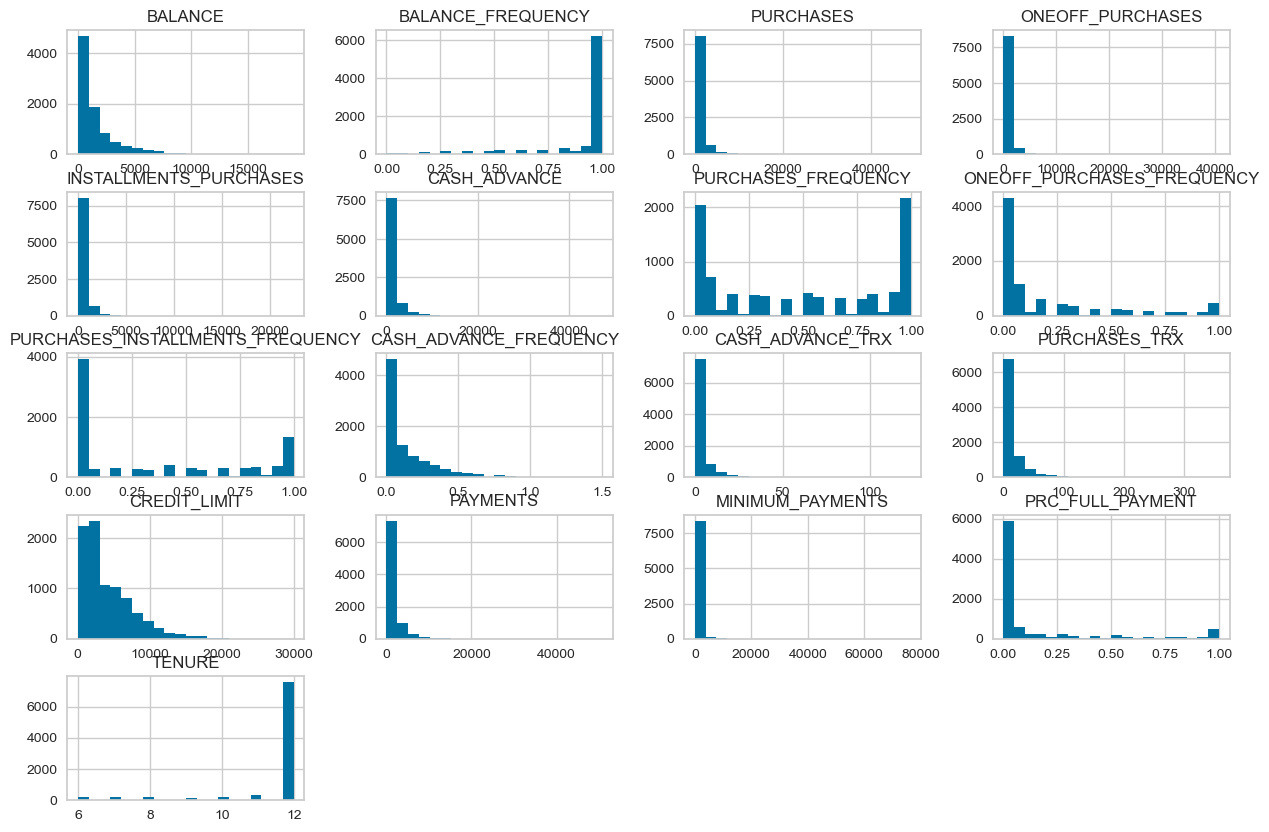

"# Pairplot untuk variabel numerik\nsns.pairplot(data.select_dtypes(include=['float64', 'int64']))\nplt.show()"

In [3]:
#Type your code here
# Menampilkan jumlah baris dan kolom
print("Shape of the dataset:", data.shape)

# Menampilkan informasi tentang dataset
print(data.info())

# Visualisasi histogram untuk variabel numerik
data.hist(bins=20, figsize=(15, 10))
plt.show()

numerical_columns = data.drop('CUST_ID',axis=1)
# Korelasi antar variabel numerik
"""correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()"""

# Visualisasi untuk variabel kategorikal
categorical_columns = data.select_dtypes(include=['object']).columns
"""for col in categorical_columns:
    sns.countplot(x=col, data=data)
    plt.show()
"""
"""# Pairplot untuk variabel numerik
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()"""


# **Data Preprocessing**

data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang dilakukan:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [4]:
#Type your code here

# Menampilkan jumlah nilai hilang di setiap kolom
print(data.isnull().sum())

# Mengisi nilai kosong dengan nilai rata-rata untuk kolom 'MINIMUM_PAYMENTS' dan 'CREDIT_LIMIT'
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())

# Mengecek jumlah duplikat
print("Jumlah duplikat:", data.duplicated().sum())

# Deteksi outlier menggunakan IQR
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    data[col] = data[col].apply(lambda x: data[col].median() if x < lower_bound or x > upper_bound else x)
    # Transformasi log (hanya untuk nilai positif)
    data[col] = np.log(data[col] + 1)


# Standarisasi kolom numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Jumlah duplikat: 0
BALANCE: 695 outliers
BALANCE_FREQUENCY: 1493 outliers
PURCHASES: 808 outliers
ONEOFF_PURCHASES: 1013 outliers
INSTALLMENTS_PURCHASES: 867 outliers
CASH_ADVANCE: 1030 outliers
PURCHASES_FREQUENCY: 0 outliers
ONEOFF_PURCHASES_FREQUENCY: 782 outliers

# **Pembangunan Model Clustering**

## **Pembangunan Model Clustering**

membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Kali ini menggunakan KMeans.

In [5]:

kmeans = KMeans( random_state=42)

kmeans.fit(data[numerical_columns])



c:\Users\Ardiansyah Putra\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Ardiansyah Putra\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Ardiansyah Putra\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ardiansyah Putra\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Ardiansyah Putra\anaconda3\Lib\subprocess.py", line 1538, in 

KMeans(random_state=42)

## **Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. 
-Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
-Silhouette Score sebagai ukuran kualitas cluster.

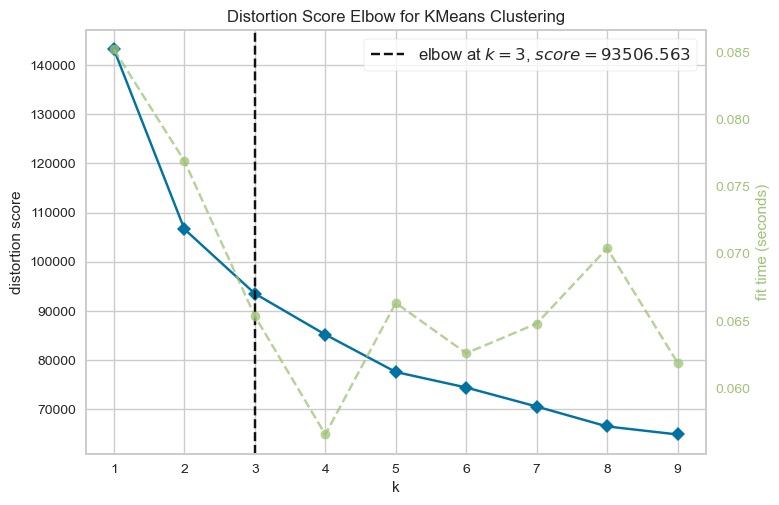

Silhouette Score untuk k=3: 0.2038498074531675


In [6]:
#Type your code here
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(data[numerical_columns])

# Menampilkan grafik elbow untuk analisis
visualizer.show()

optimal_k = visualizer.elbow_value_

# Menghitung Silhouette Score hanya untuk k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42) 
kmeans.fit(data[numerical_columns])
score = silhouette_score(data[numerical_columns], kmeans.labels_)
print(f"Silhouette Score untuk k={optimal_k}: {score}")

## **Feature Selection**

feature selection untuk optimasi model clustering. Kemudian evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [7]:
# Step 1: Feature Selection
# Menggunakan SelectKBest untuk memilih fitur terbaik
k_best_selector = SelectKBest(score_func=f_classif, k=3)

# Transformasi dataset_cleaned
X_selected = k_best_selector.fit_transform(data[numerical_columns], kmeans.labels_)

# Mendapatkan nama kolom yang dipilih
selected_features = data[numerical_columns].columns[k_best_selector.get_support()]
print("Fitur yang dipilih:", selected_features)

# Step 2: Pemodelan Ulang dengan Fitur Terpilih
# Membuat ulang model KMeans dengan fitur terpilih
kmeans_selected = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_selected.fit(X_selected)

# Step 3: Evaluasi Ulang
# Menghitung silhouette score untuk model dengan fitur terpilih
score_selected = silhouette_score(X_selected, kmeans_selected.labels_)
print(f"Silhouette Score setelah Feature Selection untuk k={optimal_k}: {score_selected}")

# Step 4: Perbandingan Performansi
print("\n=== Perbandingan Performansi ===")
print(f"Silhouette Score sebelum Feature Selection: {score}")
print(f"Silhouette Score setelah Feature Selection: {score_selected}")

c:\Users\Ardiansyah Putra\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Ardiansyah Putra\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Fitur yang dipilih: Index(['PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_TRX'], dtype='object')
Silhouette Score setelah Feature Selection untuk k=3: 0.6305873978618967

=== Perbandingan Performansi ===
Silhouette Score sebelum Feature Selection: 0.2038498074531675
Silhouette Score setelah Feature Selection: 0.6305873978618967


## **Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, selanjutnya adalah menampilkan hasil clustering melalui visualisasi.
hasil clustering dalam bentuk visualisasi  2D PCA projection.

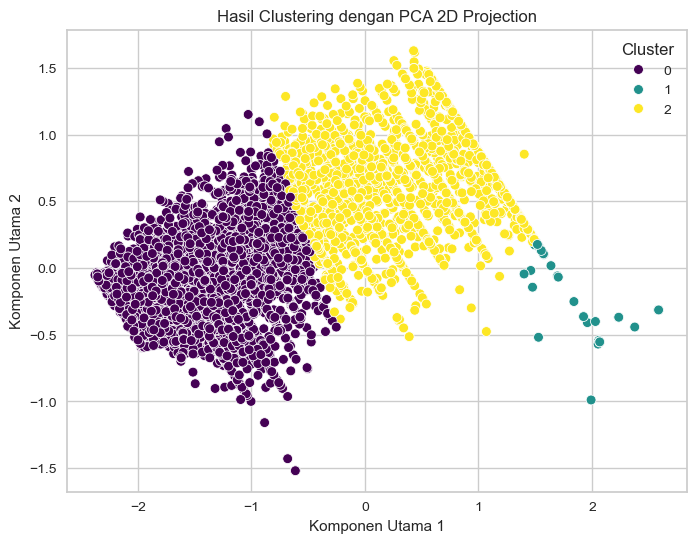

In [8]:

# Reduksi dimensi dengan PCA menggunakan data hasil feature selection
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_selected)

# Membuat DataFrame hasil PCA dan cluster untuk visualisasi
data_visual = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_visual['Cluster'] = kmeans_selected.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_visual['PCA1'],
    y=data_visual['PCA2'],
    hue=data_visual['Cluster'],
    palette='viridis',
    s=50
)
plt.title("Hasil Clustering dengan PCA 2D Projection")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(title='Cluster')
plt.show()


## **Analisis dan Interpretasi Hasil Cluster**

Selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.
Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia .

In [9]:
#Type your code here
# Menambahkan label cluster ke dataset asli
data['Cluster'] = kmeans_selected.labels_

# Menghitung statistik deskriptif untuk tiap cluster berdasarkan fitur terpilih
cluster_stats = data.groupby('Cluster')[['PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_TRX']].describe()

print("Statistik Deskriptif Tiap Cluster:")
print(cluster_stats)


Statistik Deskriptif Tiap Cluster:
        PURCHASES                                                              \
            count      mean       std       min       25%       50%       75%   
Cluster                                                                         
0          4494.0  0.661093  0.292172 -0.893855  0.451813  0.632012  0.901786   
1          2075.0 -1.710198  0.089124 -1.719565 -1.719565 -1.719565 -1.719565   
2          2381.0  0.242632  0.397905 -1.095401 -0.049008  0.244742  0.522781   

                  PURCHASES_FREQUENCY            ...                      \
              max               count      mean  ...       75%       max   
Cluster                                          ...                       
0        1.193743              4494.0  0.904540  ...  1.196820  1.196820   
1       -0.704362              2075.0 -1.297483  ... -1.302799 -0.265364   
2        1.178220              2381.0 -0.576533  ... -0.265364  1.196820   

        PURCHASES_TRX

hasil interpretasi.
1. Cluster 0: Cluster ini terdiri dari pelanggan dengan tingkat pembelian dan transaksi yang lebih tinggi, yang dapat dianggap sebagai pelanggan aktif dan premium. Mereka mungkin sering membeli dan lebih terlibat dengan produk yang ditawarkan.

2. Cluster 1: Cluster ini terdiri dari pelanggan dengan aktivitas pembelian yang sangat rendah. Mereka mungkin adalah pelanggan baru yang belum melakukan banyak pembelian, atau pelanggan pasif yang jarang membeli. Strategi untuk cluster ini bisa berfokus pada pemasaran ulang atau penawaran menarik untuk meningkatkan keterlibatan mereka.

3. Cluster 2: Cluster ini terdiri dari pelanggan yang melakukan pembelian dan transaksi dalam jumlah yang sedang. Mereka mungkin adalah pelanggan yang relatif baru, yang masih beradaptasi dengan produk atau layanan yang ditawarkan. Ini adalah segmen yang bisa lebih ditargetkan dengan penawaran yang lebih personal atau promosi untuk meningkatkan frekuensi pembelian mereka.

# **Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [15]:
# Menyimpan data dengan label cluster ke file CSV
output_file = 'customer_data_with_clusters.csv'  # Tentukan nama dan lokasi file
data.to_csv(output_file, index=False)

print(f"Hasil clustering disimpan di: {output_file}")

Hasil clustering disimpan di: customer_data_with_clusters.csv
